# Feature Engineering & Modelling

### Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [2]:
df = pd.read_csv(r"data/Travel.csv")

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning 

In [4]:
# Replace 'Fe Male' with 'Female' in the 'Gender' column
df["Gender"] = df["Gender"].str.replace("Fe Male","Female")
 # Replace 'Single' with 'Unmarried' in the 'MaritalStatus' column
df["MaritalStatus"] = df["MaritalStatus"].str.replace("Single","Unmarried")

In [5]:
# Filter columns where the percentage of missing values is greater than 0
df.isna().mean()[df.isna().mean() * 100 > 0]*100

Age                         4.623568
TypeofContact               0.511457
DurationOfPitch             5.135025
NumberOfFollowups           0.920622
PreferredPropertyStar       0.531915
NumberOfTrips               2.864157
NumberOfChildrenVisiting    1.350245
MonthlyIncome               4.766776
dtype: float64

In [6]:
# Filter columns where the percentage of missing values is greater than 0
features_na = df.isna().mean()[df.isna().mean() * 100 > 0].index
features_na

Index(['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting',
       'MonthlyIncome'],
      dtype='object')

In [7]:
df[features_na].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [8]:
# Fill missing values in 'Age' column with the median age
df["Age"].fillna(df["Age"].median(),inplace=True)

# Fill missing values in 'DurationOfPitch' column with the median duration of pitch
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(),inplace=True)

# Fill missing values in 'TypeofContact' column with the most frequent type of contact
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0],inplace=True)

# Fill missing values in 'NumberOfFollowups' column with the most frequent number of follow-ups
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0],inplace=True)

# Fill missing values in 'PreferredPropertyStar' column with the most frequent property star rating
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0],inplace=True)

# Fill missing values in 'NumberOfTrips' column with the median number of trips
df["NumberOfTrips"].fillna(df["NumberOfTrips"].median(),inplace=True)

# Fill missing values in 'NumberOfChildrenVisiting' column with the most frequent number of children visiting
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0],inplace=True)

# Fill missing values in 'MonthlyIncome' column with the median monthly income
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(),inplace=True)

In [9]:
# Again checking the missing values
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [10]:
# Drop the 'CustomerID' column from the DataFrame
df.drop("CustomerID",axis=1,inplace=True)

# Drop the 'Gender' column from the DataFrame
df.drop("Gender",axis=1,inplace=True)

In [11]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Engineering

In [12]:
# Create a new column 'TotalVisiting' by summing 'NumberOfPersonVisiting' and 'NumberOfChildrenVisiting'
df["TotalVisiting"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]

# Drop the 'NumberOfPersonVisiting' and 'NumberOfChildrenVisiting' columns from the DataFrame
df.drop(columns= ["NumberOfPersonVisiting","NumberOfChildrenVisiting"],axis=1,inplace=True)

# Types Of Features

In [13]:
numeric_features = df.select_dtypes(exclude="object").columns
len(numeric_features)

12

In [14]:
categorical_features = df.select_dtypes(include="object").columns
len(categorical_features)

5

In [15]:
discrete_features = [feature for feature in numeric_features if df[feature].nunique() <=25]
len(discrete_features)

9

In [16]:
continuous_features = [feature for feature in numeric_features if feature not in discrete_features]
len(continuous_features)

3

# Multicollinearity

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(features,df):

    X = df[features]
    X["intercept"] = 1

    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif = vif[vif["variable"]!="intercept"]

    return vif

In [18]:
compute_vif(numeric_features,df)

,variable,VIF
0,ProdTaken,1.160838
1,Age,1.341054
2,CityTier,1.017752
3,DurationOfPitch,1.010338
4,NumberOfFollowups,1.176851
5,PreferredPropertyStar,1.016609
6,NumberOfTrips,1.082175
7,Passport,1.082711
8,PitchSatisfactionScore,1.012607
9,OwnCar,1.012319


In [19]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,ProductPitched,Reject Null Hypothesis
3,MaritalStatus,Reject Null Hypothesis
4,Designation,Reject Null Hypothesis


# Outlier Handling

In [20]:
continuous_features

['Age', 'DurationOfPitch', 'MonthlyIncome']

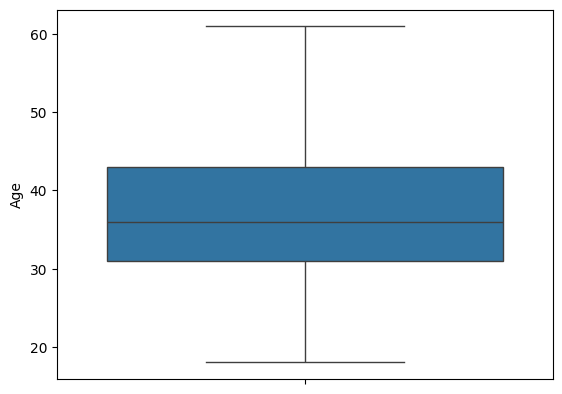

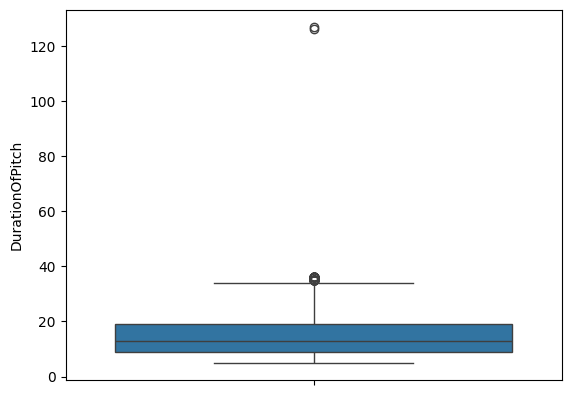

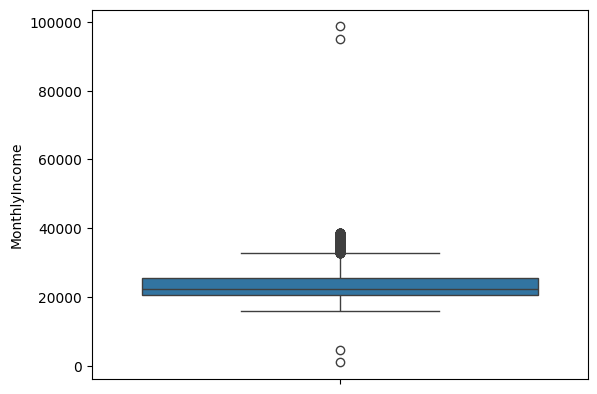

In [21]:
for feature in continuous_features:
    sns.boxplot(df[feature])
    plt.show()

In [22]:
def detect_outliers(col):

    percent25 = df[col].quantile(0.25)
    percent75 = df[col].quantile(0.75)

    iqr = percent75 - percent25

    upper_limit = percent75 + 1.5 * iqr
    lower_limit = percent25 - 1.5 * iqr

    print(f"#### {col} ####")
    print("Upper Limit",upper_limit)
    print("Lower Limit",lower_limit)

    df.loc[(df[col]>upper_limit),col] = upper_limit
    df.loc[(df[col]<lower_limit),col] = lower_limit

    return df

In [23]:
for col in continuous_features:
    detect_outliers(col)

#### Age ####
Upper Limit 61.0
Lower Limit 13.0
#### DurationOfPitch ####
Upper Limit 34.0
Lower Limit -6.0
#### MonthlyIncome ####
Upper Limit 32834.375
Lower Limit 13075.375


# Data Transformations

In [24]:
df[continuous_features].skew()

Age                0.415796
DurationOfPitch    0.942638
MonthlyIncome      0.726163
dtype: float64

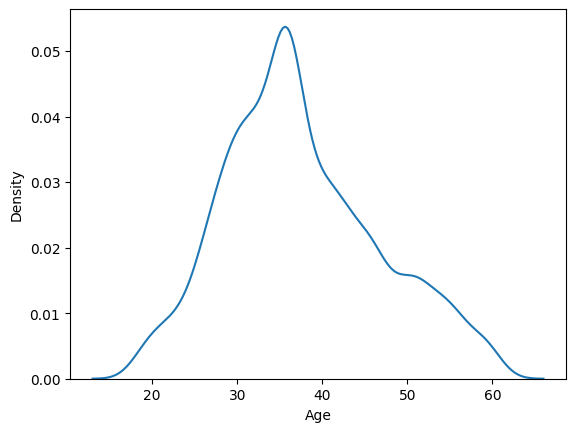

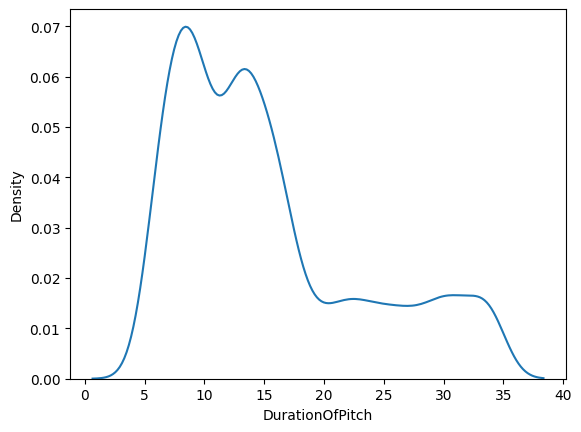

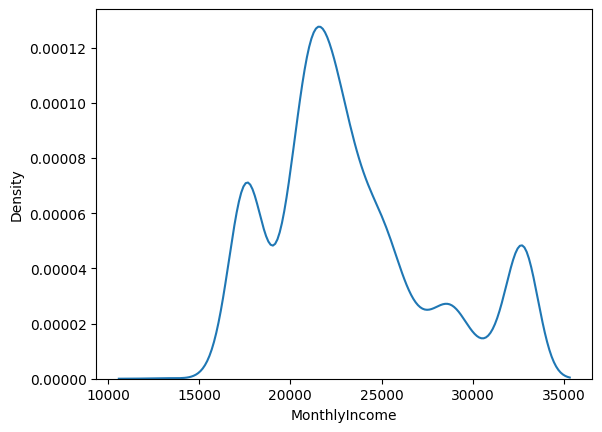

In [25]:
for i in continuous_features:
    sns.kdeplot(df[i])
    plt.show()

In [26]:
# Apply natural logarithm transformation to 'DurationOfPitch' and 'MonthlyIncome' columns
df[["DurationOfPitch","MonthlyIncome"]] = np.log(df[["DurationOfPitch","MonthlyIncome"]] )

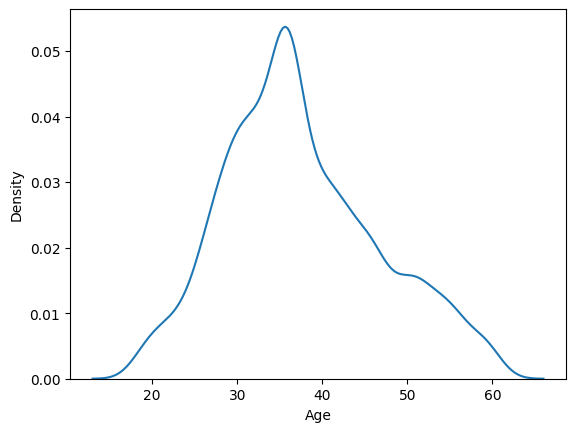

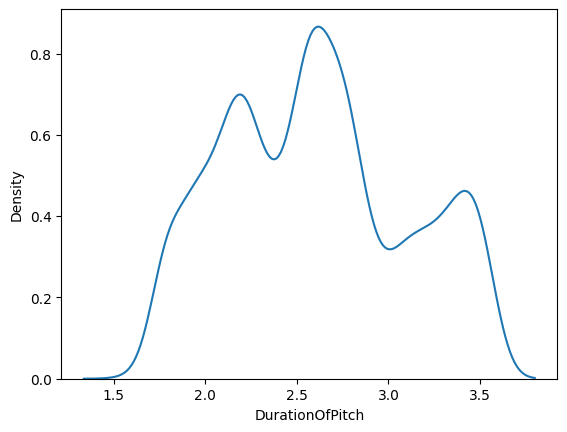

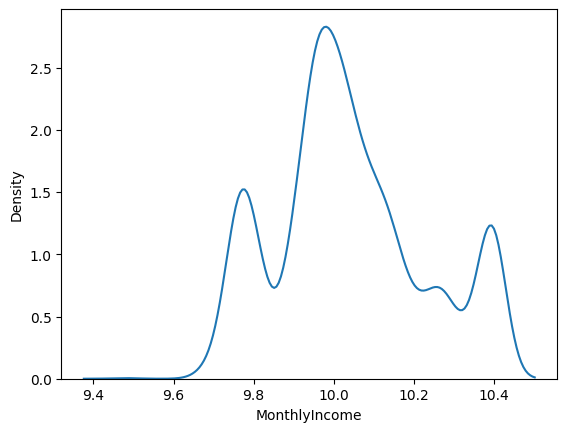

In [27]:
for i in continuous_features:
    sns.kdeplot(df[i])
    plt.show()

# Export Data To CSV

In [28]:
df.to_csv("data/cleaned_travel_data.csv",index=False)

# Split X & y

In [29]:
# Create feature matrix 'X' by dropping the 'ProdTaken' column from the DataFrame
X = df.drop("ProdTaken",axis=1)

# Create target vector 'y' containing the 'ProdTaken' column from the DataFrame
y = df["ProdTaken"]

In [30]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,1.791759,Salaried,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,9.951944,3.0
1,49.0,Company Invited,1,2.639057,Salaried,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,9.909967,5.0
2,37.0,Self Enquiry,1,2.079442,Free Lancer,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,9.746249,3.0
3,33.0,Company Invited,1,2.197225,Salaried,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,9.793059,3.0
4,36.0,Self Enquiry,1,2.079442,Small Business,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,9.823795,2.0


In [31]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

In [32]:
# Identify categorical features by selecting columns with data type 'object'
categorical_features = X.select_dtypes(include="object").columns

# Identify numeric features by selecting columns with data types other than 'object'
numeric_features = X.select_dtypes(exclude="object").columns

In [33]:
categorical_features

Index(['TypeofContact', 'Occupation', 'ProductPitched', 'MaritalStatus',
       'Designation'],
      dtype='object')

In [34]:
numeric_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Initialize the StandardScaler for numeric features
sc = StandardScaler()
# Initialize the OneHotEncoder for categorical features
ohe = OneHotEncoder()


# Create a ColumnTransformer to apply different preprocessing steps to different types of features
ct = ColumnTransformer(
    [
        ("OneHotEncoder",ohe,categorical_features), # Apply OneHotEncoder to categorical features
        ("StandardScaler",sc,numeric_features) # Apply StandardScaler to numeric features
    ]
)


# Fit and transform the feature matrix X using the ColumnTransformer
X = ct.fit_transform(X)

In [36]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.78239198,
        -0.46731026, -0.77047253],
       [ 1.        ,  0.        ,  0.        , ...,  0.78239198,
        -0.69213072,  0.64348269],
       [ 0.        ,  1.        ,  1.        , ..., -1.27813172,
        -1.56895349, -0.77047253],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78239198,
         1.76015649,  2.05743791],
       [ 0.        ,  1.        ,  0.        , ..., -1.27813172,
        -0.64999408,  0.64348269],
       [ 0.        ,  1.        ,  0.        , ...,  0.78239198,
         0.25877058,  1.3504603 ]])

In [37]:
X.shape

(4888, 30)

In [38]:
df.shape

(4888, 17)

# Handling Imbalanced Data

In [39]:
from imblearn.combine import SMOTEENN, SMOTETomek

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Initialize SMOTEENN for handling class imbalance with a random seed for reproducibility
smt = SMOTEENN(random_state=42, sampling_strategy="minority")

# Apply SMOTEENN to resample the feature matrix X and target vector y
X_res,y_res = smt.fit_resample(X,y)

In [ ]:
X_res.shape

(7123, 30)

# Train, Test & Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the resampled dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

# Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,f1_score,precision_score

In [ ]:
models = {
    "RF":RandomForestClassifier(),
    "DC":DecisionTreeClassifier(),
    "LR":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "XGB":XGBClassifier(),
    "ADA":AdaBoostClassifier(),
    "SVC":SVC()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)

    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Train Data")
    
    print("accuracy_score:",model_train_accuracy)
    print("f1_score:",model_train_f1)
    print("Precision:",model_train_precision)

    print()

    print("Model Performance for Test Data")
    
    print("accuracy_score:",model_test_accuracy)
    print("f1_score:",model_test_f1)
    print("Precision:",model_test_precision)

    print("*" * 50)

RF
Model Performance for Train Data
accuracy_score: 1.0
f1_score: 1.0
Precision: 1.0

Model Performance for Test Data
accuracy_score: 0.9775438596491228
f1_score: 0.9787516600265604
Precision: 0.9774535809018567
**************************************************
DC
Model Performance for Train Data
accuracy_score: 1.0
f1_score: 1.0
Precision: 1.0

Model Performance for Test Data
accuracy_score: 0.9340350877192982
f1_score: 0.9383202099737533
Precision: 0.9261658031088082
**************************************************
LR
Model Performance for Train Data
accuracy_score: 0.7778167778167778
f1_score: 0.8028651510432887
Precision: 0.7915259441203562

Model Performance for Test Data
accuracy_score: 0.7719298245614035
f1_score: 0.791800128122998
Precision: 0.7639060568603214
**************************************************
KNN
Model Performance for Train Data
accuracy_score: 0.984029484029484
f1_score: 0.9858277526864975
Precision: 0.972051597051597

Model Performance for Test Data
accur

# Hyperparameter Tuning

In [ ]:
# Define the parameter grid for k-Nearest Neighbors (KNN) model
knn_params = {"n_neighbors":[2,3,10,20,40,50]}

# Define the parameter grid for Random Forest (RF) model
rf_params = {"max_depth":[5,8,15,10],
             "max_features":[5,7,10],
             "min_samples_split":[2,8,15],
             "n_estimators":[100,200,500]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# List of models to be evaluated with their respective hyperparameter grids
random_cv = [
    ("KNN",KNeighborsClassifier(),knn_params),
    ("RF",RandomForestClassifier(),rf_params)
]

In [ ]:
# Initialize an empty dictionary to store the RandomizedSearchCV objects
model_params = {}

# Iterate through each model, its instance, and hyperparameter grid
for name,model,params in random_cv:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2
    )

    # Fit the RandomizedSearchCV objects on the training data
    random.fit(X_train,y_train)
    # Store the best parameters found by RandomizedSearchCV for each model
    model_params[name] = random.best_params_



Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=20; total time=   0.0s
[CV] END .....................................n_neighbors=20; total time=   0.0s
[CV] END .....................................n_n

In [ ]:
# Print the best parameters for each model
for model in model_params:
    print(model_params[model])

{'n_neighbors': 2}
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 10, 'max_depth': 15}


In [ ]:
model_params

{'KNN': {'n_neighbors': 2},
 'RF': {'n_estimators': 500,
  'min_samples_split': 2,
  'max_features': 10,
  'max_depth': 15}}

# Retraining the Model with best Parameters

In [ ]:
models = {
    "RF":RandomForestClassifier(n_estimators=100,
  min_samples_split=2,
  max_features=10,
  max_depth=15)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)

    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)

    print(list(models.keys())[i])

    print("Model Performance for Train Data")
    
    print("accuracy_score:",model_train_accuracy)
    print("f1_score:",model_train_f1)

    print()

    print("Model Performance for Test Data")
    
    print("accuracy_score:",model_test_accuracy)
    print("f1_score:",model_test_f1)

    print("*" * 50)

RF
Model Performance for Train Data
accuracy_score: 1.0
f1_score: 1.0

Model Performance for Test Data
accuracy_score: 0.9768421052631578
f1_score: 0.9781312127236581
**************************************************


# Cross Validation for Furthur Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 42)

In [ ]:
rf_cv_result = cross_val_score(RandomForestClassifier(n_estimators=100,min_samples_split=2,
  max_features=10,max_depth=15), X_test, y_test, cv=skfold,scoring="accuracy",n_jobs=-1)

rf_cv = rf_cv_result.mean()*100
print('Random Forest Classifier CV Mean Accuarcy Score is {}'.format(rf_cv))

Random Forest Classifier CV Mean Accuarcy Score is 91.09327292425883


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
best_model = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=10,max_depth=15)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)


In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       673
           1       0.97      0.98      0.98       752

    accuracy                           0.98      1425
   macro avg       0.98      0.98      0.98      1425
weighted avg       0.98      0.98      0.98      1425



# Save the Model using Pickling

In [ ]:
import pickle
 
# Save the trained model as a pickle file.
pickle.dump(best_model, open('trained_model.pkl', 'wb'))